# Tables of Content:

**1. [Introduction](#Introduction)** <br>

    - Info's about datasets
    
**2. [Librarys](#Librarys)** <br>

    - Importing Librarys
    - Importing Dataset
**3. [Exploring the data](#Known)** <br>

    - 3.1 Looking the Type of Data
    - 3.2 Shape of data
    - 3.3 Null Numbers
    - 3.4 Unique values
    - 3.5 Ploting some graphical and descriptive informations
	- 3.6 Correlation Data
**4. [Preprocess](#Preprocessing)** <br>

	- 4.1 Dummy variables
	- 4.2 Setting X and Y
    - 4.3 Spliting the X and Y in train and test 
**5. [Model](#Modelling)** <br>

    - 5.1 Model comparison 
    - 5.2 Score values
    - 5.3 Cross Validation 


<a id="Introduction"></a> <br>

## Introduction

It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, it is needed to do much preprocessing. Moreover, I planned to deploy the final model by Flask and Heroku, so I chose this version of the original dataset.

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(text, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

<a id="Librarys"></a> <br>

## Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,RepeatedStratifiedKFold # to split the data
from sklearn.metrics import roc_curve, roc_auc_score #To evaluate our model
from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import pickle

In [2]:
data=pd.read_csv("/Users/mohsen/Documents/GitHub/Credit_risk_prediction/german_credit_data.csv", index_col=0)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


<a id="Known"></a> <br>
## Exploring the data

In [3]:
# check data type and null value. saving account and checking account have numm values.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [4]:
#Looking unique values
print(data.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [5]:


print("Purpose : ",data.Purpose.unique())
print("Sex : ",data.Sex.unique())
print("Housing : ",data.Housing.unique())
print("Saving accounts : ",data['Saving accounts'].unique())
print("Risk : ",data['Risk'].unique())
print("Checking account : ",data['Checking account'].unique())


Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']


In [6]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### Visualization

<b> Target variable</b>

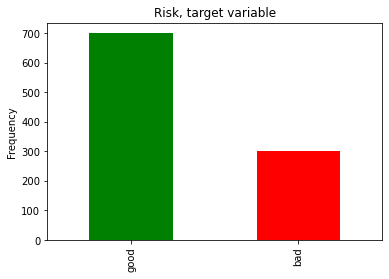

In [7]:
data.Risk.value_counts().plot(kind='bar',
                              title="Risk, target variable",
                              color=["green", "red"],
                              ylabel="Frequency");

Response variable is not balanced, so I need to take care of that.

<b>Age and Credit vs Risk</b>

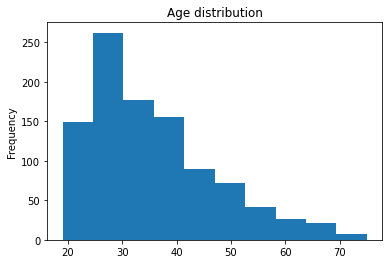

In [8]:
data.Age.plot(kind='hist', title="Age distribution");

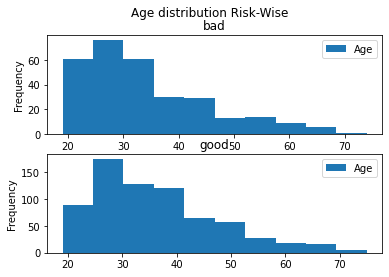

In [9]:
data.plot(kind='hist', column=["Age"], by="Risk", title="Age distribution Risk-Wise");

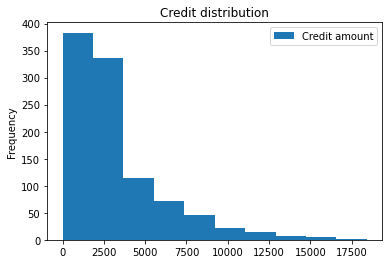

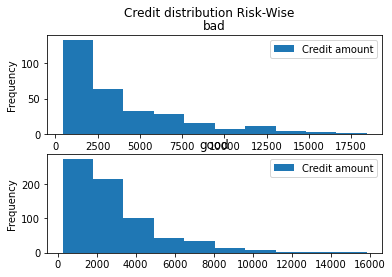

In [10]:
data.plot(kind='hist', column=["Credit amount"], title="Credit distribution");
data.plot(kind='hist', column=["Credit amount"], by="Risk", title="Credit distribution Risk-Wise");

<b>Categoricals vs Credit</b>

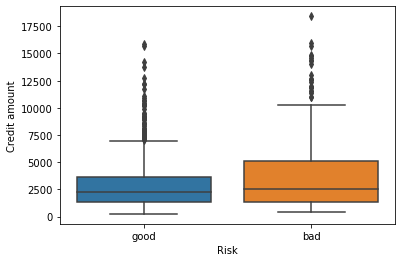

In [11]:
sns.boxplot(x="Risk", y="Credit amount", data=data);

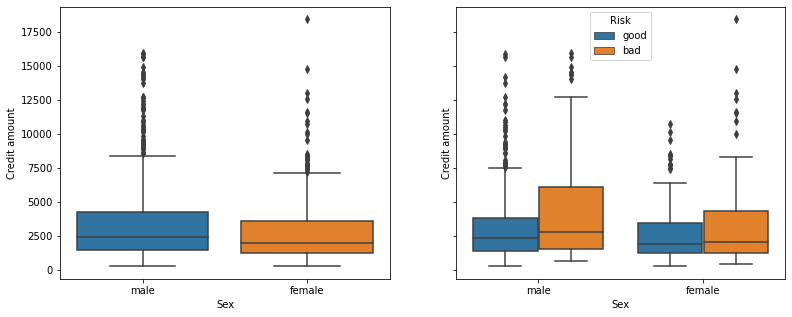

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
sns.boxplot(x="Sex", y="Credit amount", data=data, ax=ax[0])
sns.boxplot(x="Sex", y="Credit amount", hue="Risk", data=data, ax=ax[1])
plt.show()

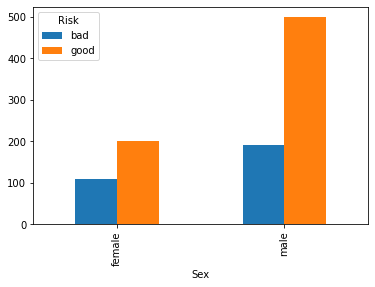

In [13]:
pd.crosstab(data.Sex, data.Risk).plot(kind="bar");

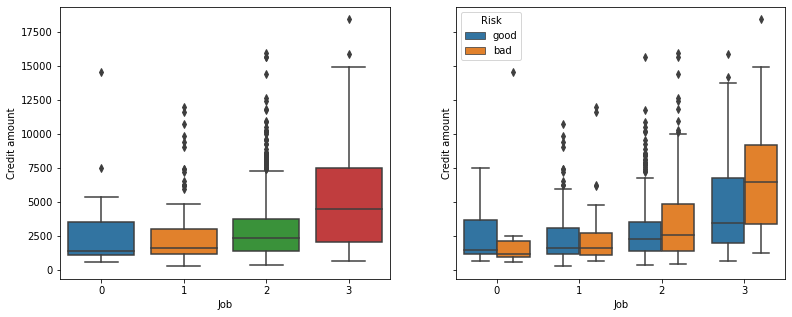

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
sns.boxplot(x="Job", y="Credit amount", data=data, ax=ax[0])
sns.boxplot(x="Job", y="Credit amount", hue="Risk", data=data, ax=ax[1])
plt.show()

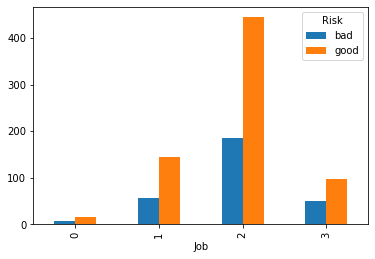

In [15]:
pd.crosstab(data.Job, data.Risk).plot(kind="bar");

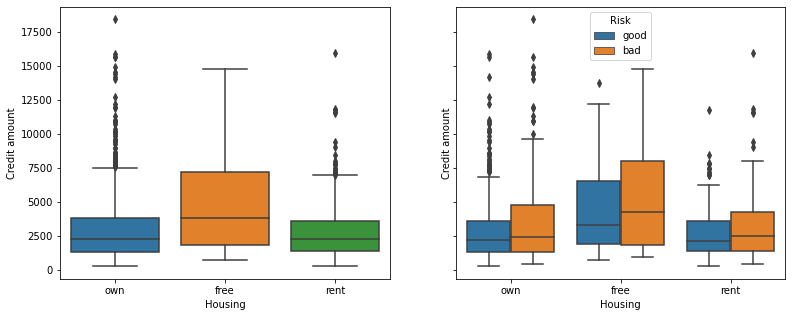

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
sns.boxplot(x="Housing", y="Credit amount", data=data, ax=ax[0])
sns.boxplot(x="Housing", y="Credit amount", hue="Risk", data=data, ax=ax[1])
plt.show()

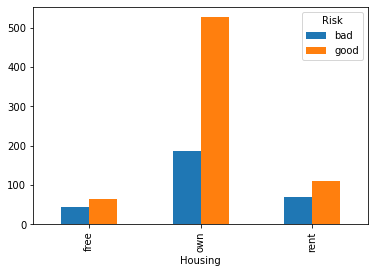

In [17]:
pd.crosstab(data.Housing, data.Risk).plot(kind="bar");

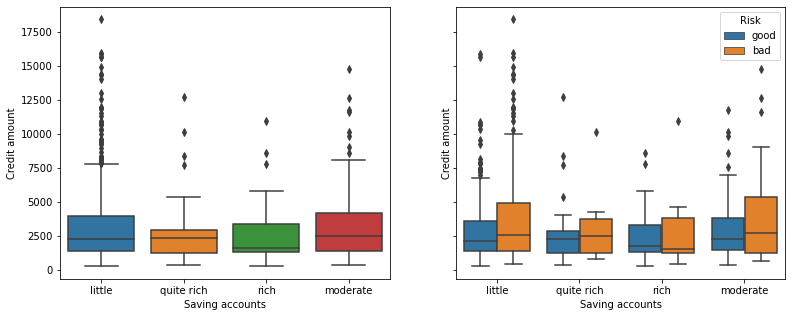

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
sns.boxplot(x="Saving accounts", y="Credit amount", data=data, ax=ax[0])
sns.boxplot(x="Saving accounts",
            y="Credit amount",
            hue="Risk",
            data=data,
            ax=ax[1])
plt.show()

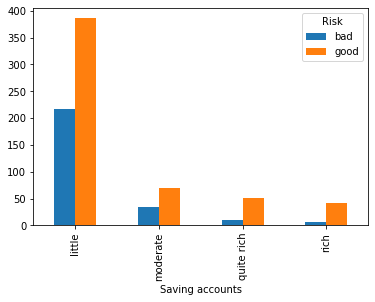

In [19]:
pd.crosstab(data["Saving accounts"], data.Risk).plot(kind="bar");

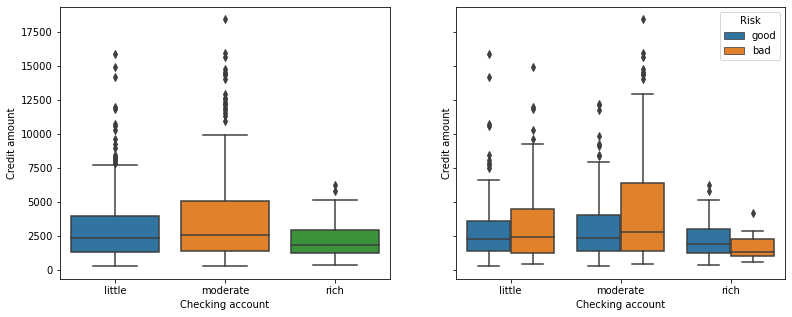

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
sns.boxplot(x="Checking account", y="Credit amount", data=data, ax=ax[0])
sns.boxplot(x="Checking account",
            y="Credit amount",
            hue="Risk",
            data=data,
            ax=ax[1])
plt.show()

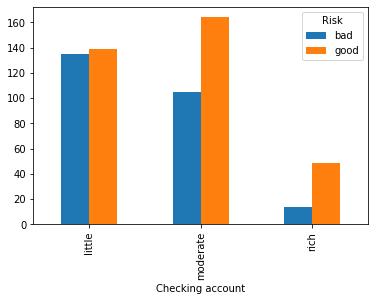

In [21]:
pd.crosstab(data["Checking account"], data.Risk).plot(kind="bar");

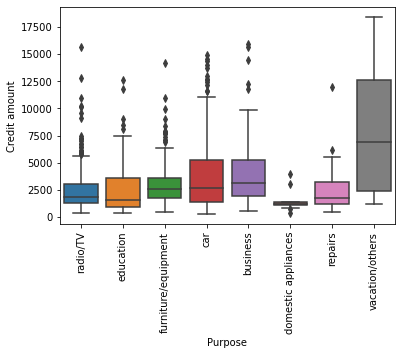

In [22]:
ax=sns.boxplot(x="Purpose", y="Credit amount", data=data)
ax.tick_params(axis='x', labelrotation=90)

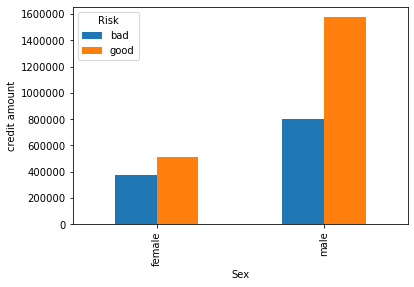

In [23]:
data.groupby(by=["Sex","Risk"])["Credit amount"].sum().unstack().plot(kind="bar", ylabel="credit amount")
plt.ticklabel_format(style='plain', axis='y')

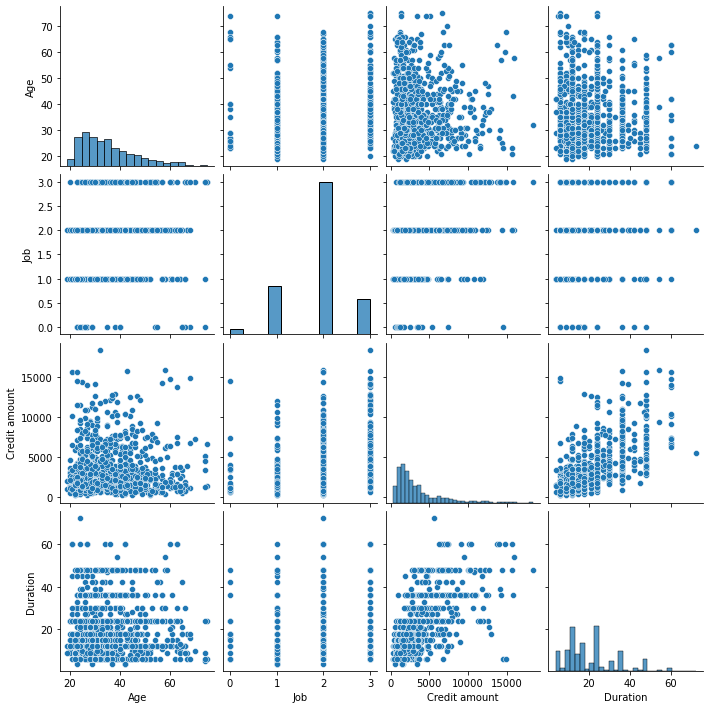

In [24]:
sns.pairplot(data)
plt.show()

<a id="Preprocessing"></a> <br>
## Preprocessing

In [25]:
data['Credit amount'] = np.log(data['Credit amount'])

In [26]:
X = data.drop('Risk', axis=1)
y = data['Risk']

In [27]:
X = pd.get_dummies(X,
                   columns=[
                       'Sex', "Housing", 'Saving accounts', 'Checking account',
                       'Purpose'
                   ],
                   drop_first=True)

In [28]:
X.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [29]:
y = pd.get_dummies(y,drop_first=True)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

<a id="Modelling"></a> <br>
## Model

In [31]:
import warnings
warnings.filterwarnings('ignore')

model, AUC mean, AUC STD
LR: 0.661098 (0.062965)
LDA: 0.660287 (0.063446)
KNN: 0.559524 (0.069973)
CART: 0.547089 (0.066613)
NB: 0.621888 (0.065075)
RF: 0.630530 (0.061013)
SVM: 0.599334 (0.070275)


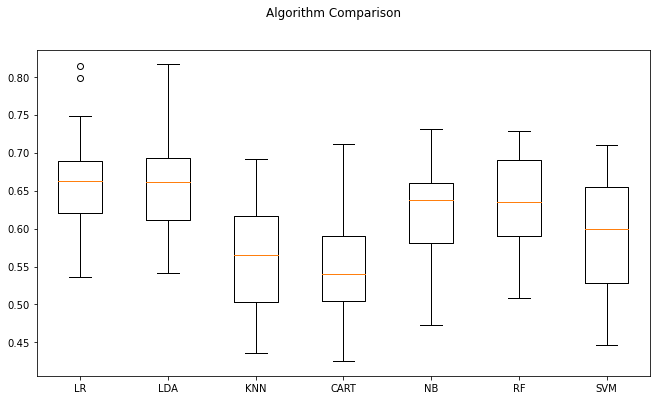

In [32]:
seed = 123

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
print("model, AUC mean, AUC STD")
for name, model in models:
        kfold=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
params = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2"]
}  # l1 lasso l2 ridge
model = LogisticRegression()
kfold=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

logreg_cv = GridSearchCV(model, params, cv=kfold)
logreg_cv.fit(X, y)
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.7160000000000001


In [34]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.69


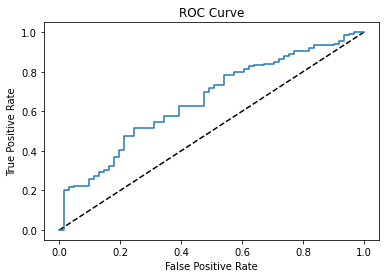

In [35]:
#Predicting proba
y_pred_prob = logreg2.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

0.6567991508432598

In [37]:
pickle.dump(logreg_cv, open('model.pkl','wb'))